In [35]:
import sys, os
import numpy as np


In [36]:
d=dict()
for j in range(20): # 20 parallel simulation trajectories
    print j
    d[j]=np.load('com/distance_%d.npy'%j)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [37]:
# compute dwell time
# if we consider the process is binomial then only two states exist (bound vs. unbound)

total_converted = []
cutoff = 1.0 # in the unit of nm

for j in range(20):
    converted = []
    for k in d[j]:
        if k <= cutoff:
            converted.append(0)
        else:
            converted.append(1)
    total_converted.append(converted)
np.save('total_converted.npy',total_converted)
print "total_converted", total_converted
    
    

total_converted [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [38]:
# let's compute how many binding and unbinding events happened and the dwell time
# 0 --> bound state, 1 --> unbound state
ns_per_frame = 0.1   # frames were saved every 0.1 ns
total_binding = []
total_unbinding = []
times_binding = []
times_unbinding = []
for i in range(20):
    print i
    dis = total_converted[i]
    unbinding = np.where(np.diff(dis)>0.5)[0]+1
    binding = np.where(np.diff(dis)<-0.5)[0]+1
    #print bound
    #print unbound
    times_binding.append(len(binding))
    times_unbinding.append(len(unbinding))
    dwell_binding = []
    dwell_unbinding = []
    dwell_binding.append(binding[0])
    # since the first event is binding for sure so the number of unbinding events cannot be more than the number of binding events
    if len(binding) != len(unbinding):
        for j in range(len(unbinding)):
            dwell_binding.append((binding[1:][j]-unbinding[j])*ns_per_frame)
            dwell_unbinding.append((unbinding[j]-binding[j])*ns_per_frame)
    else:
        for j in range(len(unbinding)):
            dwell_unbinding.append((unbinding[j]-binding[j])*ns_per_frame)
        for j in range(len(binding)-1):
            dwell_binding.append((binding[1:][j]-unbinding[j])*ns_per_frame)
    print dwell_binding
    print dwell_unbinding
    total_binding.append(dwell_binding)
    total_unbinding.append(dwell_unbinding)
np.save('total_binding_dwell.npy',total_binding)
np.save('total_unbinding_dwell.npy',total_unbinding)
print "Done!"

0
[14, 0.5, 0.5, 0.30000000000000004, 0.10000000000000001, 2.2000000000000002, 0.10000000000000001, 0.30000000000000004, 0.20000000000000001, 0.30000000000000004, 0.10000000000000001, 0.20000000000000001, 0.30000000000000004, 2.0, 0.20000000000000001, 0.30000000000000004, 0.80000000000000004, 0.30000000000000004, 0.20000000000000001, 0.20000000000000001, 0.60000000000000009, 0.60000000000000009, 0.10000000000000001, 0.10000000000000001, 0.70000000000000007, 0.5, 0.60000000000000009, 0.10000000000000001, 0.60000000000000009, 0.10000000000000001, 0.10000000000000001, 0.70000000000000007, 0.10000000000000001, 0.90000000000000002, 0.30000000000000004, 0.20000000000000001, 0.60000000000000009, 0.70000000000000007, 0.10000000000000001, 0.30000000000000004, 0.40000000000000002, 0.30000000000000004, 0.10000000000000001, 0.10000000000000001, 0.30000000000000004, 0.10000000000000001, 1.4000000000000001, 0.20000000000000001, 0.40000000000000002, 1.5, 1.1000000000000001, 0.5, 0.30000000000000004, 

Binding events dwell time distribution
longest dwell time 14 ns
longest dwell time 8 ns
longest dwell time 6 ns
longest dwell time 4 ns
longest dwell time 7 ns
longest dwell time 5 ns
longest dwell time 3.2 ns
longest dwell time 5 ns
longest dwell time 18 ns
longest dwell time 11 ns
longest dwell time 6 ns
longest dwell time 4 ns
longest dwell time 12 ns
longest dwell time 4.0 ns
longest dwell time 3.2 ns
longest dwell time 4.0 ns
longest dwell time 4.6 ns
longest dwell time 3.9 ns
longest dwell time 7 ns
longest dwell time 6 ns


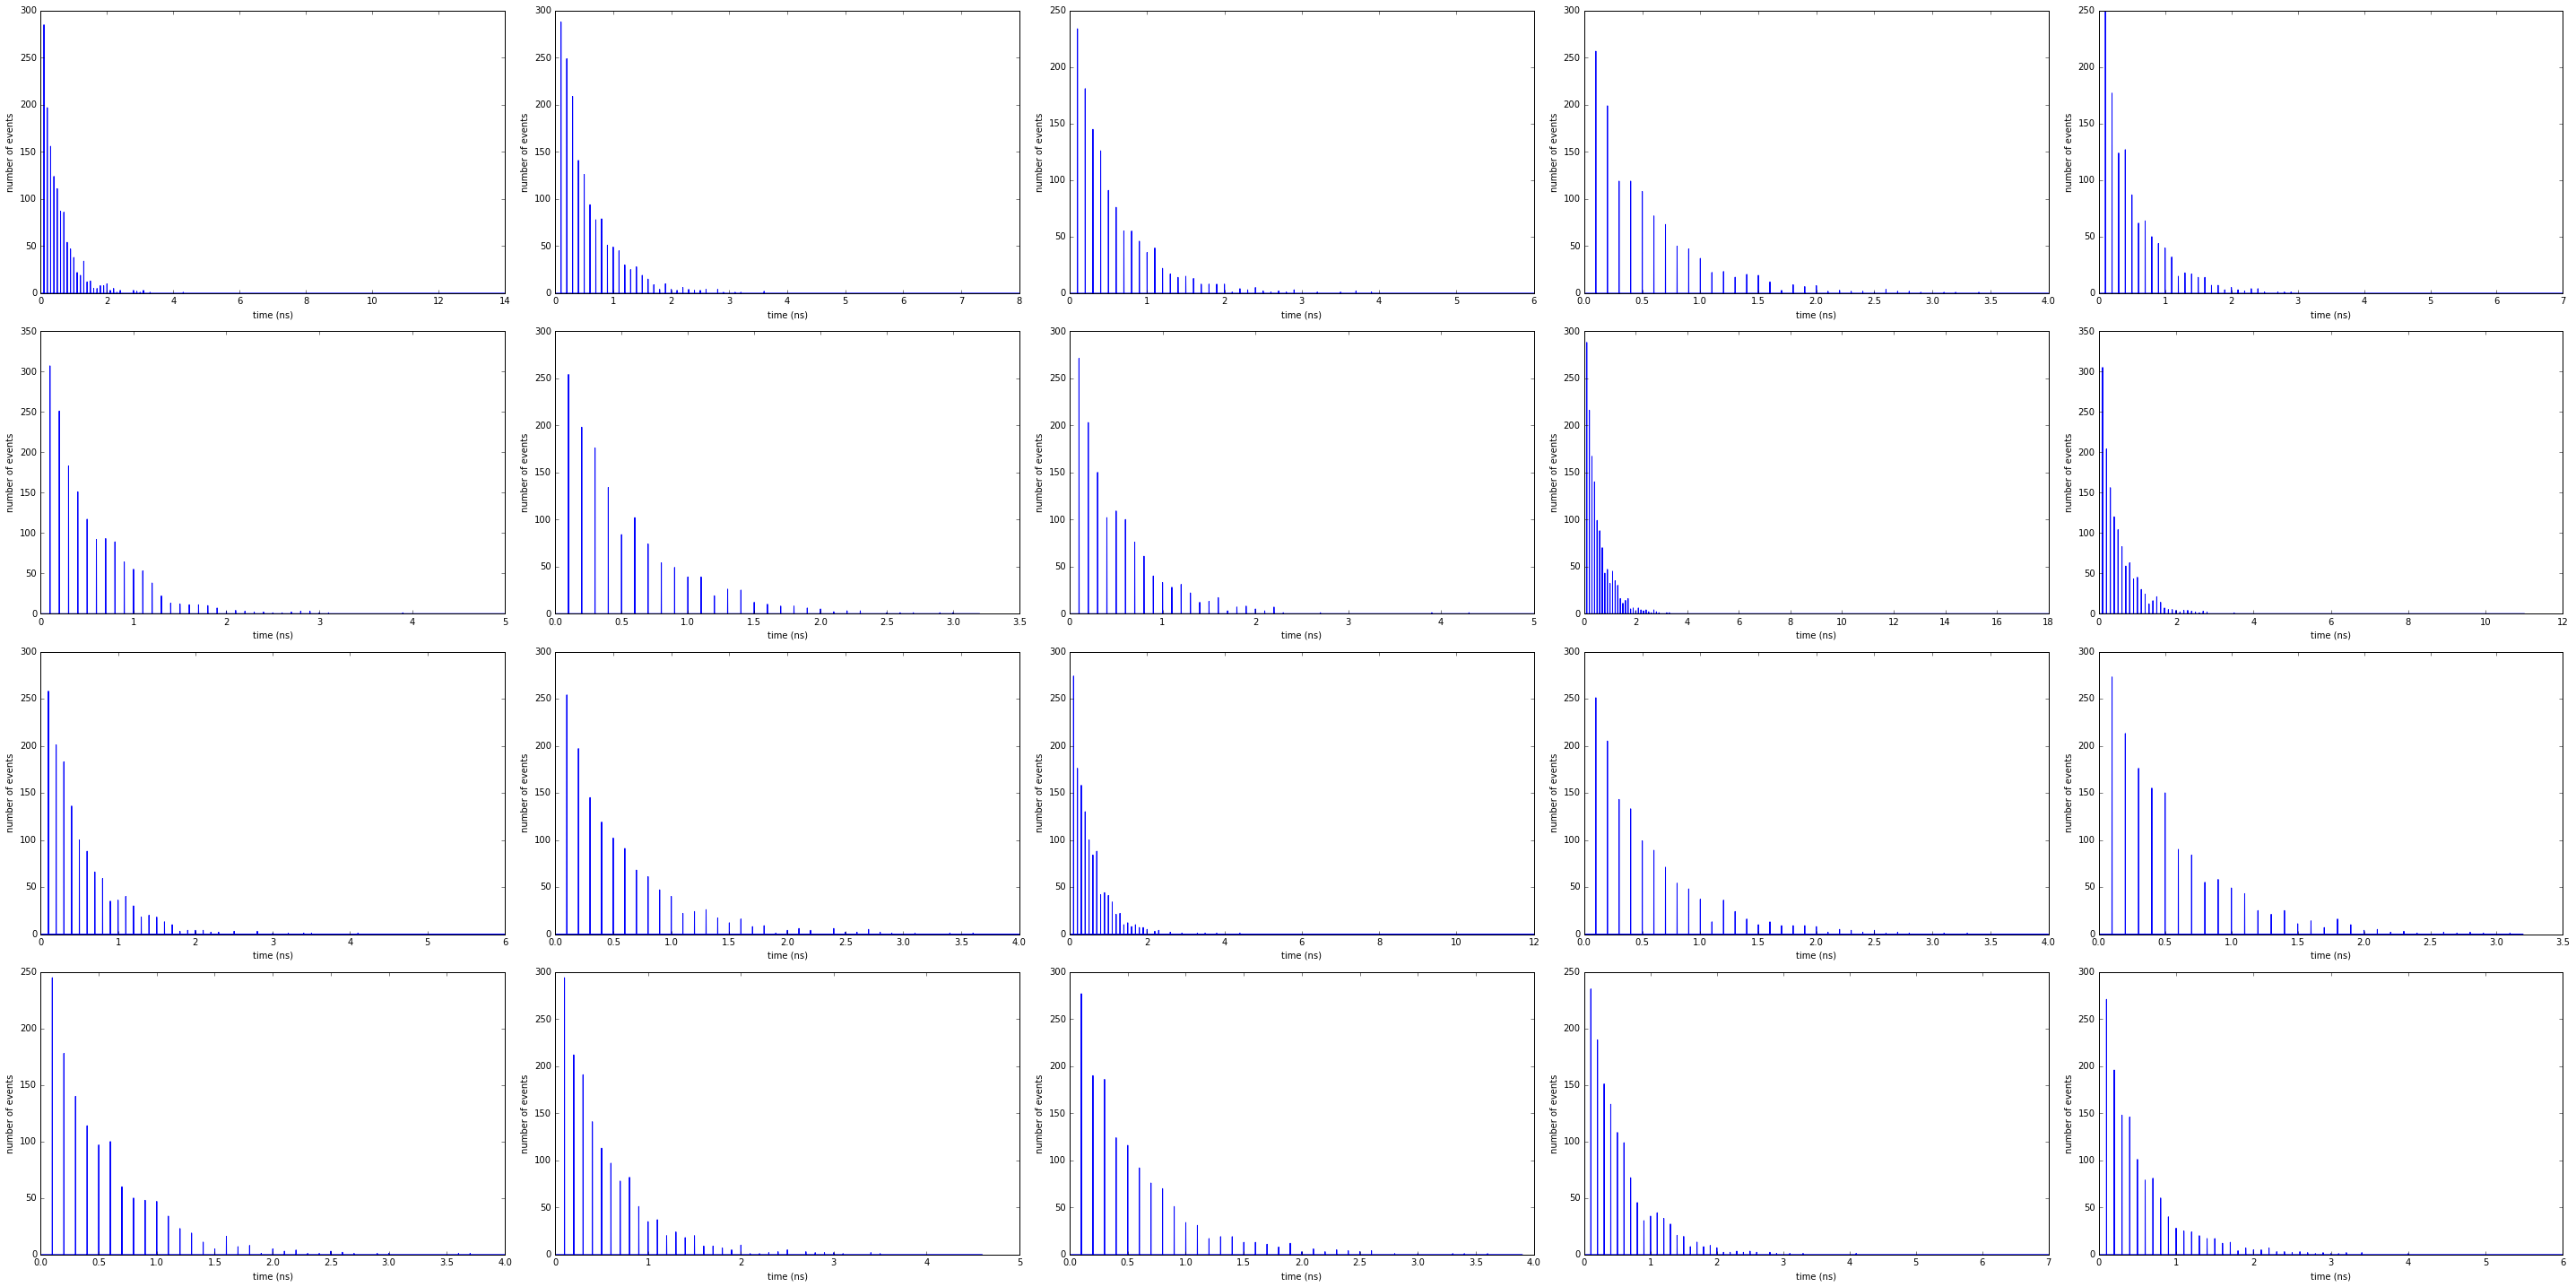

Unbinding events dwell time distribution
longest dwell time 176.9 ns
longest dwell time 126.4 ns
longest dwell time 129.1 ns
longest dwell time 108.8 ns
longest dwell time 117.1 ns
longest dwell time 110.1 ns
longest dwell time 127.8 ns
longest dwell time 127.1 ns
longest dwell time 100.9 ns
longest dwell time 125.8 ns
longest dwell time 128.8 ns
longest dwell time 140.6 ns
longest dwell time 121.5 ns
longest dwell time 140.0 ns
longest dwell time 156.8 ns
longest dwell time 132.1 ns
longest dwell time 152.5 ns
longest dwell time 100.2 ns
longest dwell time 148.1 ns
longest dwell time 158.3 ns


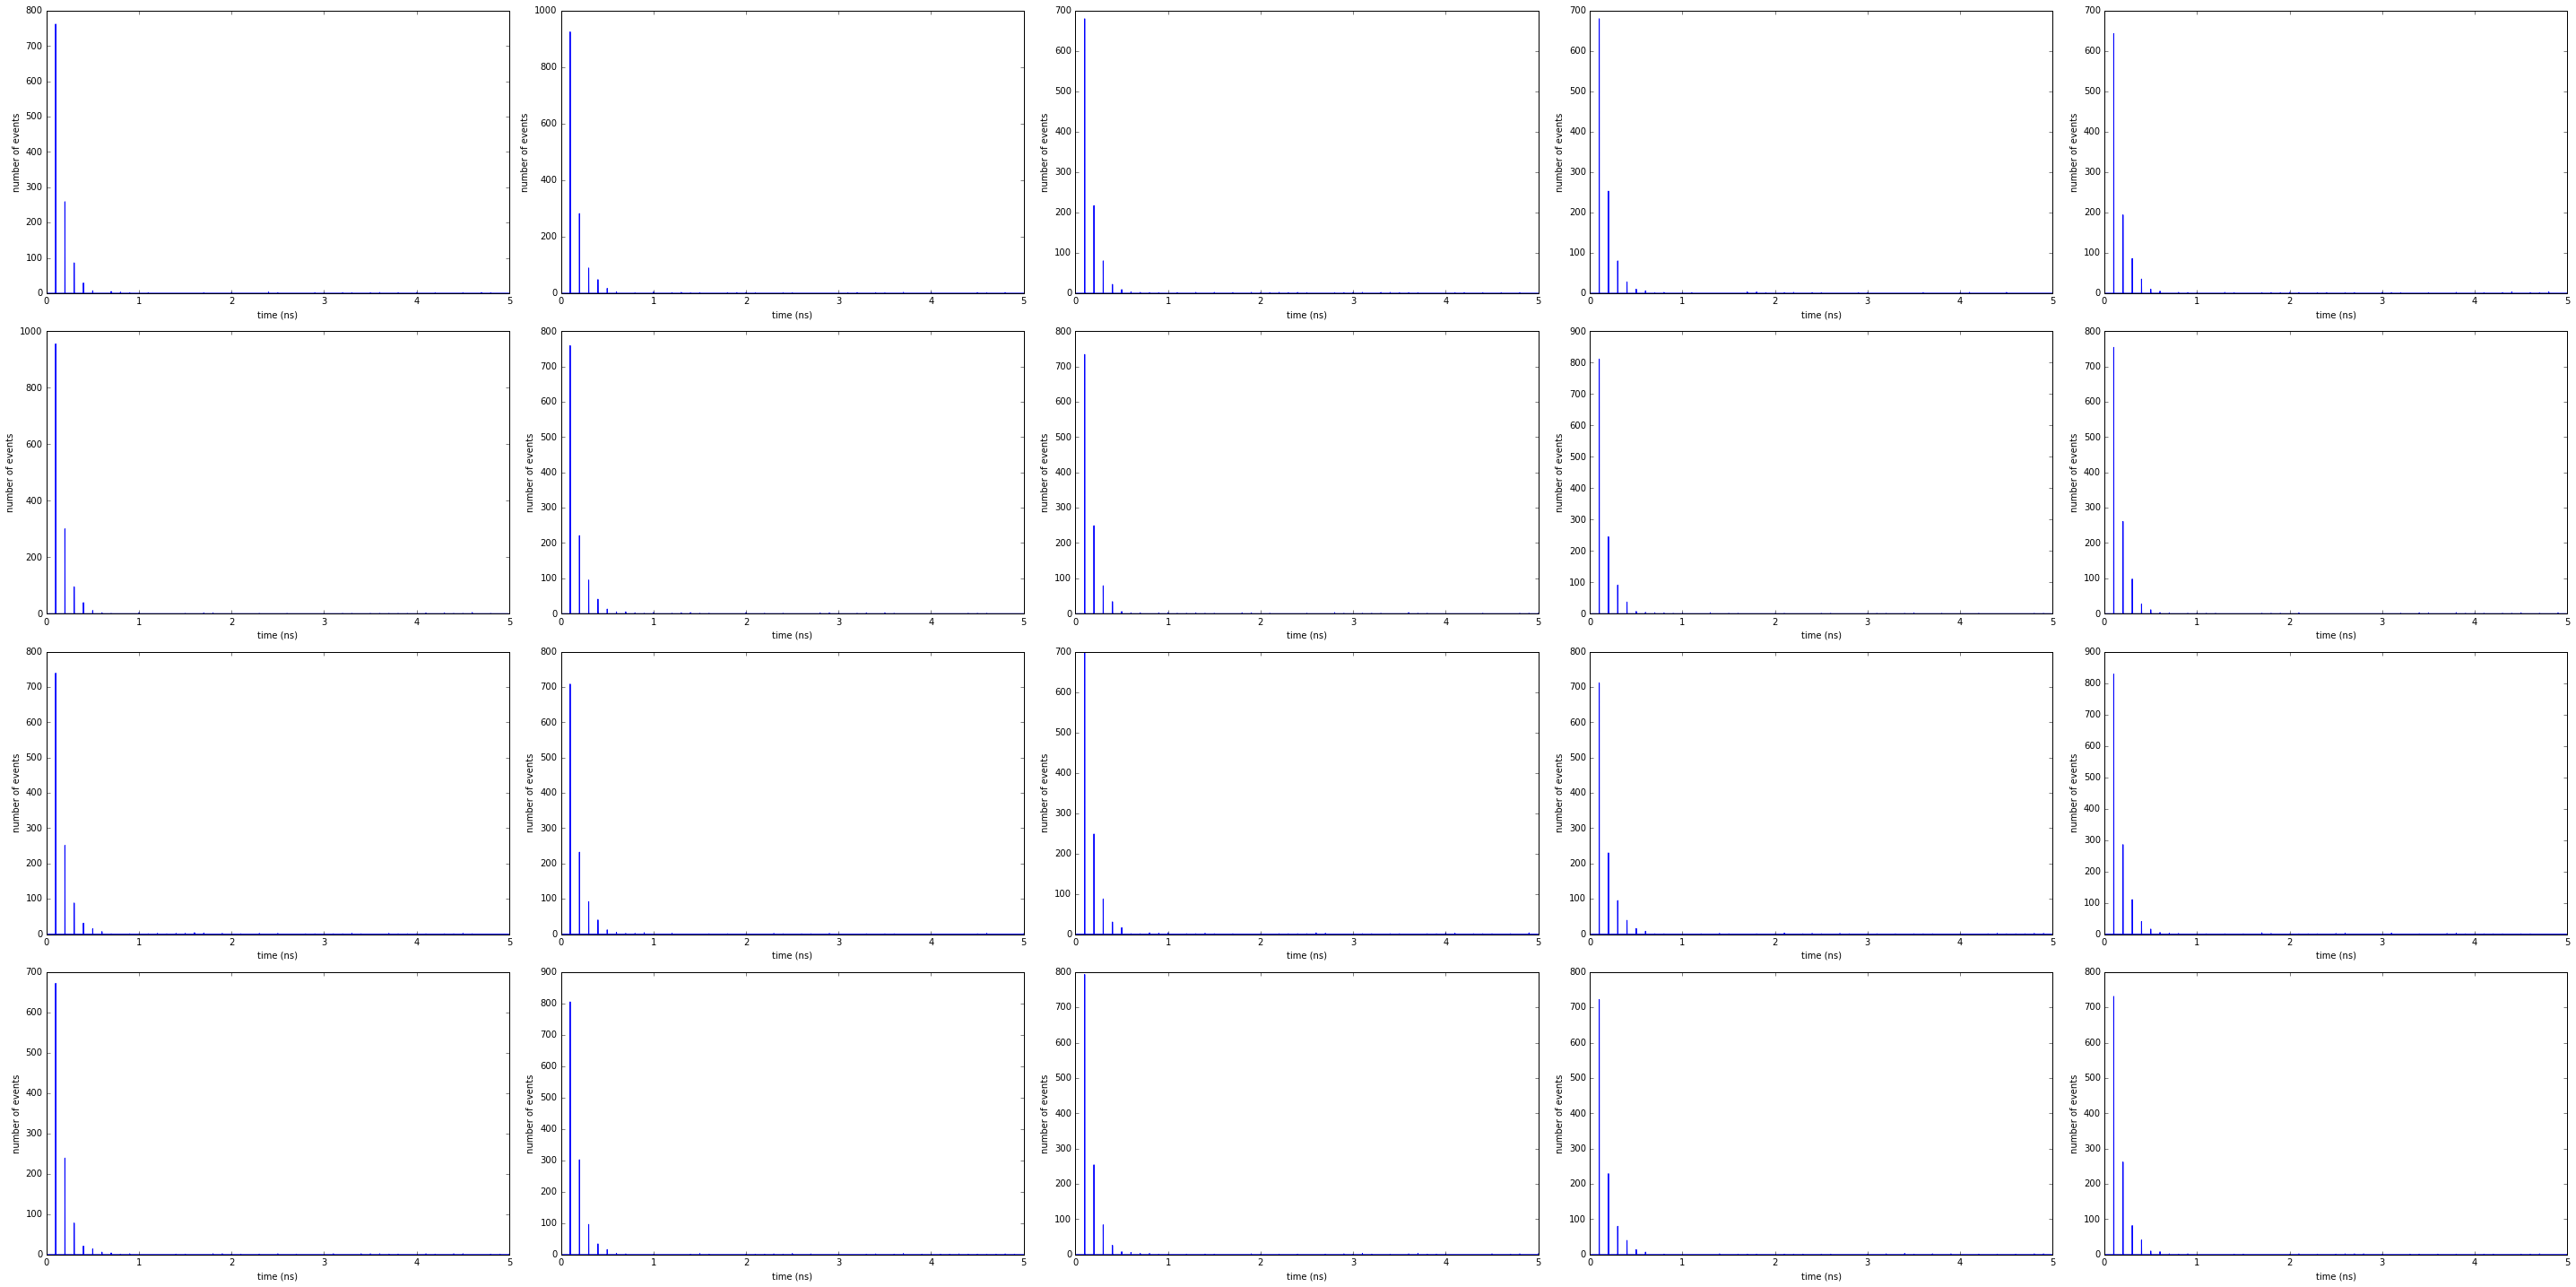

In [40]:
# let's plot dwell time distribution
from matplotlib import pyplot as plt
%matplotlib inline

binding_total = np.load('total_binding_dwell.npy')
unbinding_total = np.load('total_unbinding_dwell.npy')

print "Binding events dwell time distribution"
plt.figure(figsize=(40,20))
for i in range(20):
    binding = binding_total[i]
    print "longest dwell time", max(binding),"ns"
    counts_binding,bins_binding = np.histogram(binding, bins=np.arange(0,max(binding),0.001) )
    bincenters_binding = (bins_binding[0:-1]+bins_binding[1:])/2.0
    plt.subplot(4,5,i+1)
    plt.plot(bincenters_binding, counts_binding)
    plt.xlabel('time (ns)')
    plt.ylabel('number of events')
plt.tight_layout()
plt.savefig('dwell_time_binding.pdf')
plt.show()
plt.close()  

print "Unbinding events dwell time distribution"
plt.figure(figsize=(40,20))    
for i in range(20):
    unbinding = unbinding_total[i]
    print "longest dwell time", max(unbinding),"ns"
    counts_unbinding,bins_unbinding = np.histogram(unbinding, bins=np.arange(0,max(unbinding),0.001) )
    bincenters_unbinding = (bins_unbinding[0:-1]+bins_unbinding[1:])/2.0
    plt.subplot(4,5,i+1)
    plt.plot(bincenters_unbinding, counts_unbinding)
    plt.xlim(0,5)
    plt.xlabel('time (ns)')
    plt.ylabel('number of events')
plt.tight_layout()
plt.savefig('dwell_time_unbinding.pdf')
plt.show()
plt.close()    



In [41]:
# let's compute averaged dwell time for binding and unbinding

binding_total = np.load('total_binding_dwell.npy')
unbinding_total = np.load('total_unbinding_dwell.npy')
reshape_binding = []
reshape_unbinding = []
for i in range(20):
    for j in binding_total[i]:
        reshape_binding.append(j)
    for k in unbinding_total[i]:
        reshape_unbinding.append(k)
print "avg dwell time for binding", np.mean(reshape_binding),'ns', 'std', np.std(reshape_binding)
print "avg dwell time for unbinding", np.mean(reshape_unbinding),'ns', 'std', np.std(reshape_unbinding)


    

avg dwell time for binding 0.541249629849 ns std 0.530288953744
avg dwell time for unbinding 3.89249203645 ns std 12.8456014479
